In [1]:
import pandas as pd

import numpy as np

In [2]:
data=pd.read_csv('logement-encadrement-des-loyers.csv',sep=';')

In [3]:
data.head()

,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Année,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d
0,2,1,St-Germain-l'Auxerrois,1,1946-1970,meublé,35.4,42.48,24.78,2021,PARIS,7510101,"{""coordinates"": [[[2.344593389828428, 48.85404...","48.860650135209916,2.3349103292802087"
1,2,1,St-Germain-l'Auxerrois,2,1971-1990,meublé,29.3,35.16,20.51,2021,PARIS,7510101,"{""coordinates"": [[[2.344593389828428, 48.85404...","48.860650135209916,2.3349103292802087"
2,2,4,Place-Vendôme,4,Apres 1990,meublé,29.5,35.40,20.65,2021,PARIS,7510104,"{""coordinates"": [[[2.3319449693932333, 48.8649...","48.86701859062769,2.328581664931251"
3,2,3,Palais-Royal,3,Avant 1946,meublé,30.9,37.08,21.63,2021,PARIS,7510103,"{""coordinates"": [[[2.339465868602756, 48.86213...","48.86465997810256,2.3363089189653103"
4,10,42,Saint-Ambroise,1,Apres 1990,non meublé,29.2,35.04,20.44,2021,PARIS,7511142,"{""coordinates"": [[[2.370939691376834, 48.85779...","48.86234502354469,2.3761180559189916"


In [4]:
data.isnull().sum()

Secteurs géographiques          0
Numéro du quartier              0
Nom du quartier                 0
Nombre de pièces principales    0
Epoque de construction          0
Type de location                0
Loyers de référence             0
Loyers de référence majorés     0
Loyers de référence minorés     0
Année                           0
Ville                           0
Numéro INSEE du quartier        0
geo_shape                       0
geo_point_2d                    0
dtype: int64

In [8]:
data['Epoque de construction']=data['Epoque de construction'].astype(str)

In [9]:
data['Epoque de construction'] = data['Epoque de construction'].replace({'1946-1970':'1', '1971-1990':'2','Apres 1990':'3', 'Avant 1946':'4'})

In [14]:
data['Epoque de construction']=data['Epoque de construction'].astype(int)

In [15]:
data['Epoque de construction'].dtype

dtype('int64')

In [18]:
data['Type de location']=data['Type de location'].astype(str)

In [19]:
data['Type de location']=data['Type de location'].replace({'meublé':'1','non meublé':'0'})

In [20]:
data['Type de location'].astype(int)

0       1
1       1
2       1
3       1
4       0
       ..
7675    1
7676    1
7677    1
7678    1
7679    1
Name: Type de location, Length: 7680, dtype: int64

In [24]:
X=data[['Numéro du quartier','Nombre de pièces principales','Epoque de construction','Type de location']]

In [26]:
y=data['Loyers de référence']

In [27]:
'BASELINE MODEL' 


'BASELINE MODEL'

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

In [32]:
from sklearn.model_selection import cross_validate


model=LinearRegression()


cv_results = cross_validate(model, X, y, cv=5)

In [33]:
mean_score = cv_results['test_score'].mean()
mean_score

0.6645902059722426

In [37]:
from sklearn.ensemble import RandomForestRegressor


model_tree=RandomForestRegressor()


cv_results_tree = cross_validate(model_tree, X, y, cv=5)

In [38]:
mean_score_tree = cv_results_tree['test_score'].mean()
mean_score_tree

0.9757551511046303

In [40]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator =RandomForestRegressor(),
                                                                                           X = X_train, 
                                                                                           y = y_train, 
                                                                                           train_sizes = [250,500,750,1200,], cv = 5,
                                                                                           
                                                                                            )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

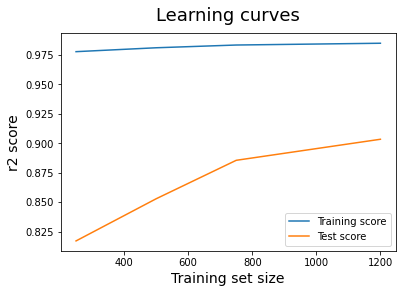

In [42]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')

plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [59]:
model_regressor_tree=RandomForestRegressor(n_estimators=300,max_features=1,min_samples_leaf=3,random_state=0)


cv_results_model = cross_validate(model_regressor_tree, X, y, cv=5)

In [60]:
cv_results_model

{'fit_time': array([0.62829328, 0.67079639, 0.6245327 , 0.63447475, 0.62472034]),
 'score_time': array([0.05787659, 0.06374145, 0.05449057, 0.05478716, 0.05673862]),
 'test_score': array([0.94323526, 0.9424806 , 0.94783571, 0.93585139, 0.93981075])}

In [67]:

train_sizes, train_scores, test_scores = learning_curve(estimator =RandomForestRegressor(n_estimators=300,max_features=1,min_samples_leaf=3,random_state=0),
                                                                                           X = X_train, 
                                                                                           y = y_train, 
                                                                                           train_sizes = [250,500,750,1200,], cv = 5,
                                                                                           
                                                                                            )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

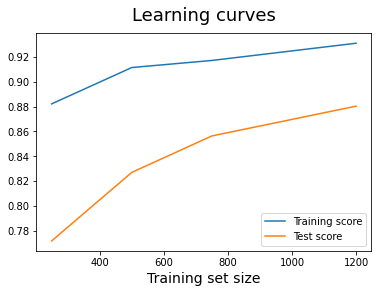

In [68]:

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')

plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [61]:
regressor_tree=RandomForestRegressor(n_estimators=300,max_features=1,min_samples_leaf=3,random_state=0)

regressor_tree.fit(X,y)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [64]:
regressor_tree.score(X,y)

0.9711597292580816

In [66]:
regressor_tree.predict([[1,2,1,1]])

array([28.77852469])

In [69]:
import joblib

filename = 'model.joblib'
joblib.dump(regressor_tree, filename)

['model.joblib']